In [69]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [70]:
weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

len(X), len(y)

(100, 100)

In [71]:
train_split = int(0.8 * len(X))
train_split

80

In [72]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [73]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14})

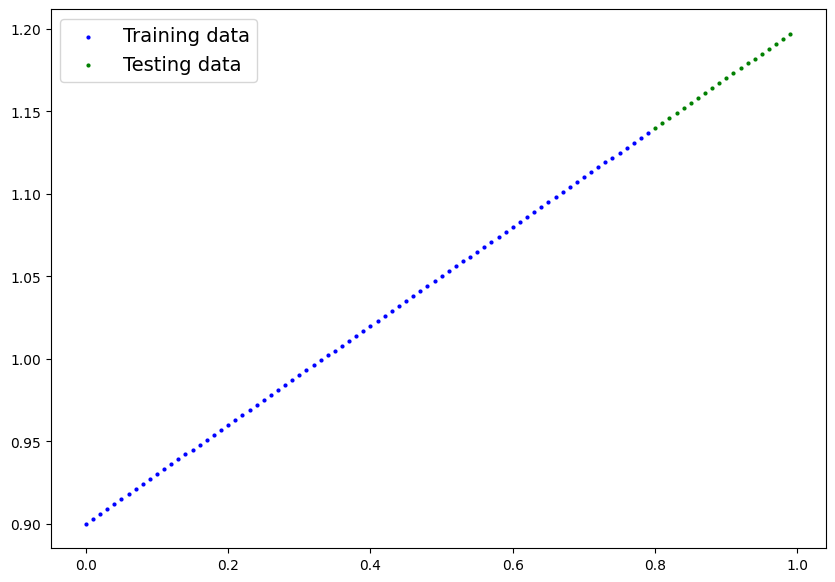

In [74]:
plot_prediction()

In [75]:
class LinearRegressionModel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [76]:
torch.manual_seed(42)
model_0 = LinearRegressionModel2()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [77]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [78]:
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4015],
        [0.4049],
        [0.4083],
        [0.4116],
        [0.4150],
        [0.4184],
        [0.4217],
        [0.4251],
        [0.4285],
        [0.4318],
        [0.4352],
        [0.4386],
        [0.4419],
        [0.4453],
        [0.4487],
        [0.4520],
        [0.4554],
        [0.4588],
        [0.4621]])

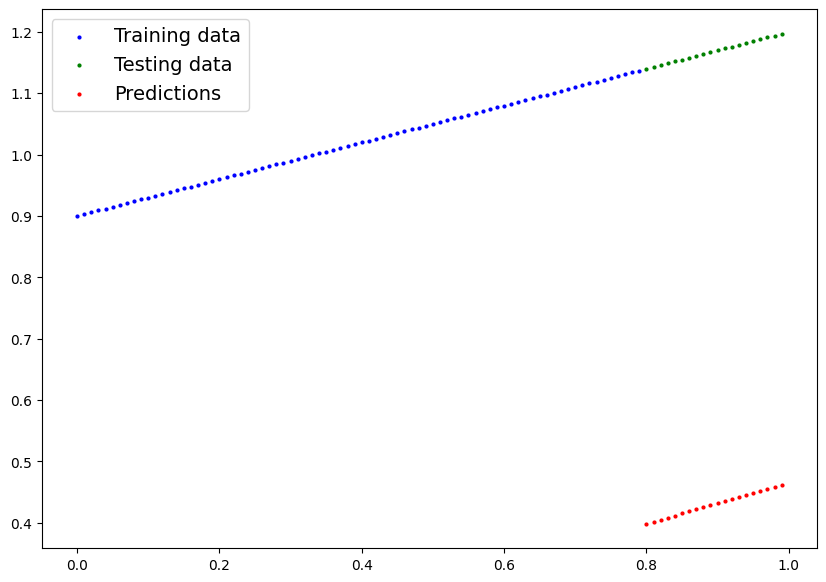

In [79]:
plot_prediction(predictions=y_preds)

In [80]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [81]:
epochs = 300

epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
    
    if epoch % 20 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())

        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.7566978335380554 | Test loss: 0.7248174548149109
Epoch: 20 | Loss: 0.5254928469657898 | Test loss: 0.4541124403476715
Epoch: 40 | Loss: 0.2942880392074585 | Test loss: 0.18340764939785004
Epoch: 60 | Loss: 0.07658576965332031 | Test loss: 0.07274086028337479
Epoch: 80 | Loss: 0.05255373567342758 | Test loss: 0.11581540107727051
Epoch: 100 | Loss: 0.045542728155851364 | Test loss: 0.10467890650033951
Epoch: 120 | Loss: 0.03868866711854935 | Test loss: 0.08938358724117279
Epoch: 140 | Loss: 0.03183453157544136 | Test loss: 0.07408786565065384
Epoch: 160 | Loss: 0.024982359260320663 | Test loss: 0.0581042543053627
Epoch: 180 | Loss: 0.018130185082554817 | Test loss: 0.04212062805891037
Epoch: 200 | Loss: 0.011278990656137466 | Test loss: 0.02579306997358799
Epoch: 220 | Loss: 0.004429381340742111 | Test loss: 0.009467745199799538
Epoch: 240 | Loss: 0.00370177929289639 | Test loss: 0.006489443592727184
Epoch: 260 | Loss: 0.00370177929289639 | Test loss: 0.006489443592727

In [82]:
from pprint import pprint
print("The model learned the following values for weights and bias: ")
pprint(model_0.state_dict())
print("\nAnd and the orginial values for weights and bais are: ")
print(f"weights: {weight}, bais: {bias}")

The model learned the following values for weights and bias: 
OrderedDict([('weights', tensor([0.3067])), ('bias', tensor([0.9011]))])

And and the orginial values for weights and bais are: 
weights: 0.3, bais: 0.9


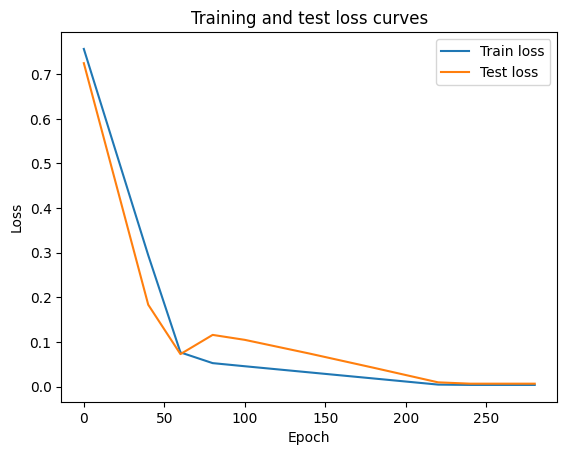

In [83]:
plt.plot(epoch_count,train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

In [84]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3067])), ('bias', tensor([0.9011]))])

In [85]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)


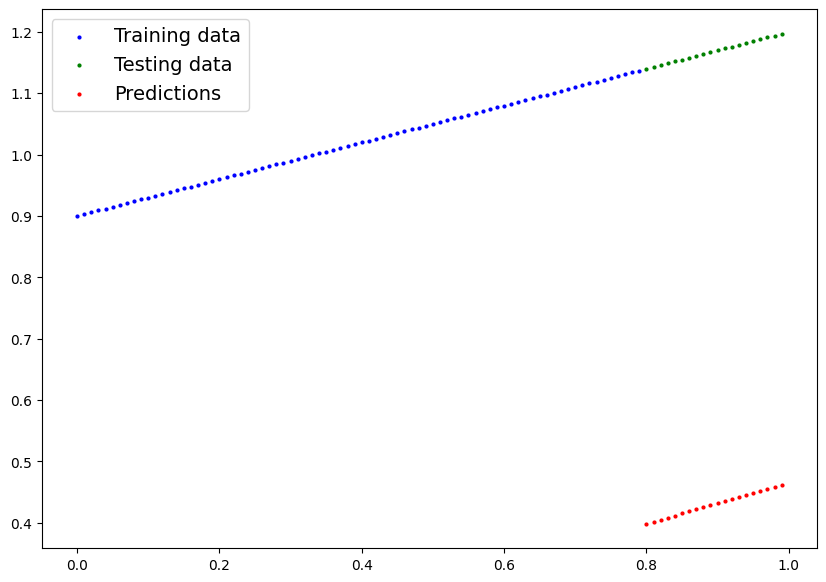

In [86]:
plot_prediction(predictions=y_preds)

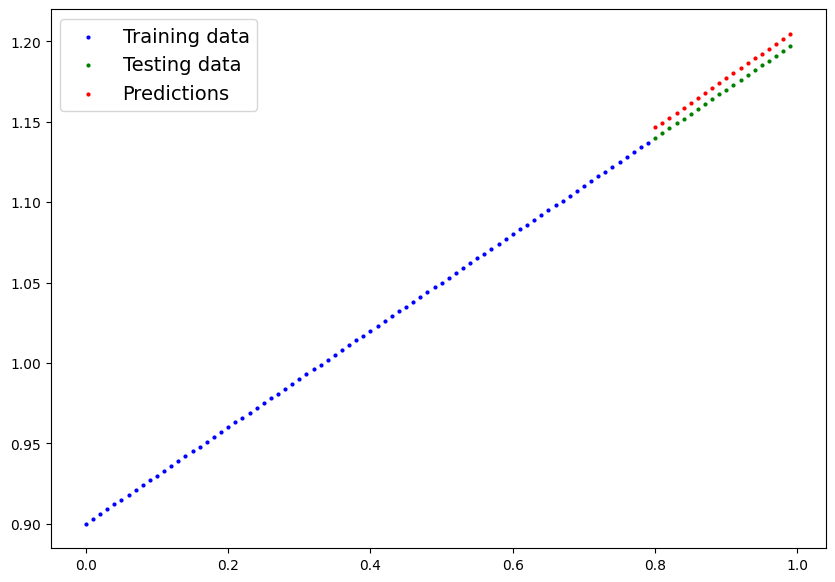

In [87]:
plot_prediction(predictions=y_preds_new)

In [88]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "pytorch_workflow_model_0_exercise.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

In [89]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3067])), ('bias', tensor([0.9011]))])

In [90]:
loaded_model_0 = LinearRegressionModel2()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [91]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[1.1464],
        [1.1495],
        [1.1525],
        [1.1556],
        [1.1587],
        [1.1617],
        [1.1648],
        [1.1679],
        [1.1709],
        [1.1740],
        [1.1771],
        [1.1801],
        [1.1832],
        [1.1863],
        [1.1893],
        [1.1924],
        [1.1955],
        [1.1985],
        [1.2016],
        [1.2047]])

In [92]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

In [93]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])